# Data Analysis of Google App Store Ratings

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
googleapp = pd.read_csv('googleplaystore.csv')

In [4]:
googleapp.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [5]:
googleapp.shape

(10841, 13)

In [6]:
googleapp.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
googleapp.index

RangeIndex(start=0, stop=10841, step=1)

In [8]:
googleapp.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2784
Android Ver         33
dtype: int64

In [9]:
googleapp.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [10]:
googleapp.count()

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64

In [11]:
googleapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Data Cleaning

In [12]:
googleapp.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [13]:
threshold = len(googleapp)*0.1
threshold

1084.1000000000001

In [14]:
googleapp[googleapp.Rating >5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
googleapp.drop([10472], inplace=True)

In [16]:
googleapp['Rating'].fillna(0, inplace= True)

In [17]:
googleapp.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [18]:
#Modes of categorical values
print(googleapp['Type'].mode())
print(googleapp['Current Ver'].mode())
print(googleapp['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [19]:
# FIll missing categorical values with mode
googleapp['Type'].fillna(str(googleapp['Type'].mode()), inplace=True)
googleapp['Current Ver'].fillna(str(googleapp['Current Ver'].mode()), inplace=True)
googleapp['Android Ver'].fillna(str(googleapp['Android Ver'].mode()), inplace=True)

In [20]:
googleapp.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [21]:
#Convert Price column to numerical data type using lambda
googleapp['Price'] = googleapp['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
googleapp['Price'] = googleapp['Price'].apply(lambda x: float(x))

In [22]:
googleapp[googleapp.Price > 1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,Solitaire+,GAME,4.6,11235,Varies with device,"100,000+",Paid,2.99,Everyone,Card,"July 30, 2018",Varies with device,Varies with device
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,"1,000+",Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11M,"10,000+",Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up
10785,"sugar, sugar",FAMILY,4.2,1405,9.5M,"10,000+",Paid,1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up


In [23]:
googleapp['Installs'] = googleapp['Installs'].str.replace('[\+\,]', '').astype(float)

<ipython-input-23-a7979df50c6d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  googleapp['Installs'] = googleapp['Installs'].str.replace('[\+\,]', '').astype(float)


In [24]:
googleapp["Reviews"] = googleapp["Reviews"].astype(int)

In [25]:
googleapp.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size               object
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [26]:
googleapp.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,3.621771,4.441529e+05,1.546434e+07,1.027368
std,1.514563,2.927761e+06,8.502936e+07,15.949703
min,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,3.700000,3.800000e+01,1.000000e+03,0.000000
50%,4.200000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


##### Data Visualization

In [32]:
grp = googleapp.groupby('Category')
x=grp['Rating'].agg(np.mean)
y=grp['Price'].agg(np.mean)
z=grp['Reviews'].agg(np.mean)
t=grp['Price']


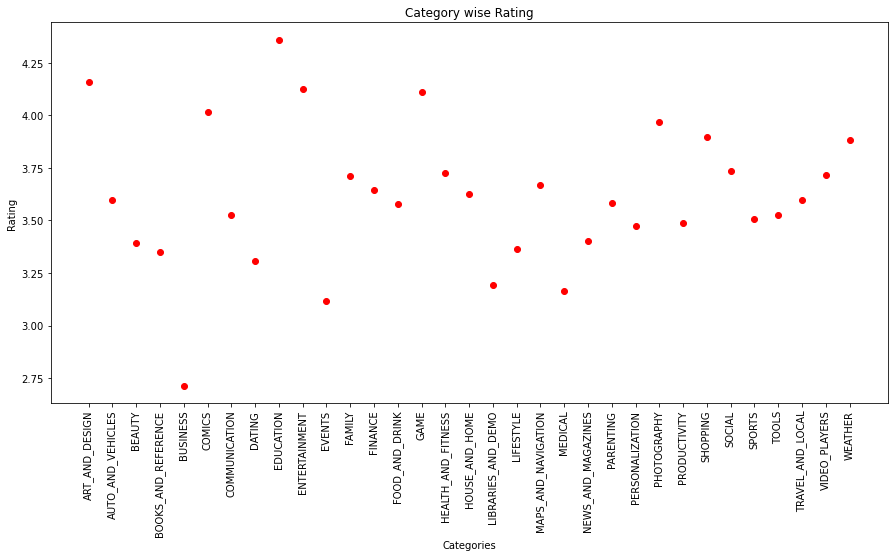

In [28]:
plt.figure(figsize=(15,7))
plt.plot(x, 'ro')
plt.xticks(rotation=90)
plt.title("Category wise Rating")
plt.xlabel("Categories")
plt.ylabel("Rating")
plt.show()

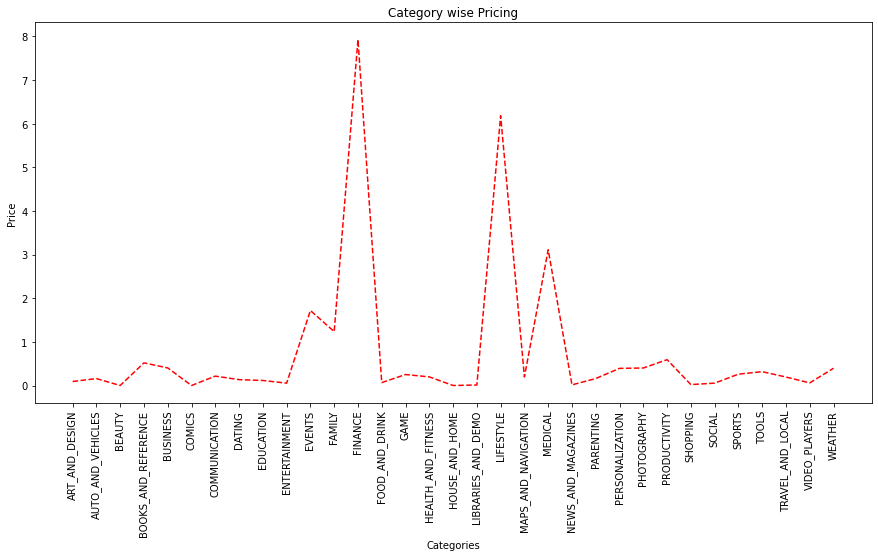

In [35]:
plt.figure(figsize=(15,7))
plt.plot(y, 'r--')
plt.xticks(rotation=90)
plt.title("Category wise Pricing")
plt.xlabel("Categories")
plt.ylabel("Price")
plt.show()

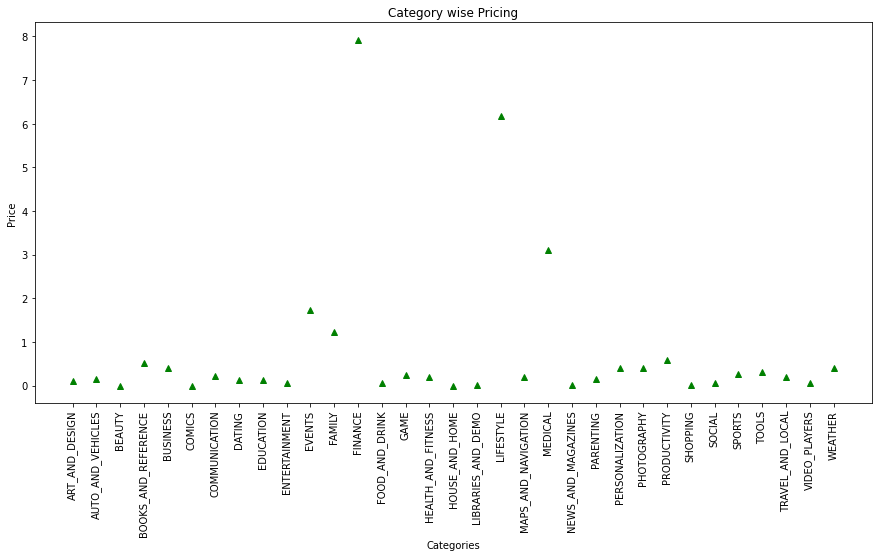

In [36]:
plt.figure(figsize=(15,7))
plt.plot(y, 'g^')
plt.xticks(rotation=90)
plt.title("Category wise Reviews")
plt.xlabel("Categories")
plt.ylabel("Reviews")
plt.show()